# Training Notebook
This notebook trains and evaluates models on the dataset using multiple loops from d2 to d35.

## Step 1: Setup and Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

Mounted at /content/drive


## Step 2: Load Dataset

In [ ]:
# --- Step 1: Load dataset ---
df = pd.read_csv("/content/drive/MyDrive/features_d30_1500_samples.csv")
print(df.shape)

(1500, 7)


In [ ]:
display(df)

,V1,V2,R_mean,G_mean,B_mean,RGB_mean,Class
0,0.105125,1.154466,23091.278287,32293.773700,22183.730887,25856.260958,0
1,0.125179,1.156333,31658.666667,32733.775401,28436.991087,30943.144385,0
2,1.447282,1.161065,24463.830041,30281.533093,10210.210238,21651.857791,1
3,2.185356,1.097254,23376.362128,28615.268149,10183.121059,20724.917112,1
4,0.098344,1.143593,22487.550178,31570.539502,21460.817082,25172.968921,0
...,...,...,...,...,...,...,...
1495,0.136873,1.148679,29694.492344,32159.208481,27493.917550,29782.539458,0
1496,0.399446,1.035009,21706.806767,27269.248536,10808.909587,19928.321630,1
1497,0.000183,0.736664,33966.019522,33462.140614,30859.688216,32762.616117,2
1498,0.033004,1.096723,25795.922581,29256.774194,23889.032258,26313.909677,0


## Step 3: Feature Selection and Preprocessing

In [ ]:
# --- Step 2: Define features and labels ---
from sklearn.preprocessing import MinMaxScaler

# Select features
X = df[["V1", "V2", "R_mean", "G_mean", "B_mean", "RGB_mean"]].copy()
y = df["Class"]

# Normalize selected features to 0-255 range
scaler = MinMaxScaler(feature_range=(0, 255))
X[["R_mean", "G_mean", "B_mean", "RGB_mean"]] = scaler.fit_transform(X[["R_mean", "G_mean", "B_mean", "RGB_mean"]])

print(X.shape, y.shape)

(1500, 6) (1500,)


In [ ]:
display(X)

,V1,V2,R_mean,G_mean,B_mean,RGB_mean
0,0.105125,1.154466,126.200255,169.943518,138.174039,150.065792
1,0.125179,1.156333,195.474031,173.813739,190.299125,194.529732
2,1.447282,1.161065,137.298368,152.244005,38.366774,113.315525
3,2.185356,1.097254,128.505373,137.587667,38.140967,105.213229
4,0.098344,1.143593,121.318660,163.582005,132.148071,144.093205
...,...,...,...,...,...,...
1495,0.136873,1.148679,179.592205,168.759892,182.437980,184.385000
1496,0.399446,1.035009,115.005762,125.748182,43.357331,98.250267
1497,0.000183,0.736664,214.130713,180.220383,210.493919,210.433552
1498,0.033004,1.096723,148.069338,143.230304,152.388861,154.066054


## Step 4: Train Decision Tree Models

In [ ]:
# --- Shuffle and split (70% train, 30% test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1050, 6) (1050,) (450, 6) (450,)


In [ ]:
# --- Step 4: Cross-validation setup ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Decision Tree CV Accuracy: 0.9880 (+/- 0.0058)


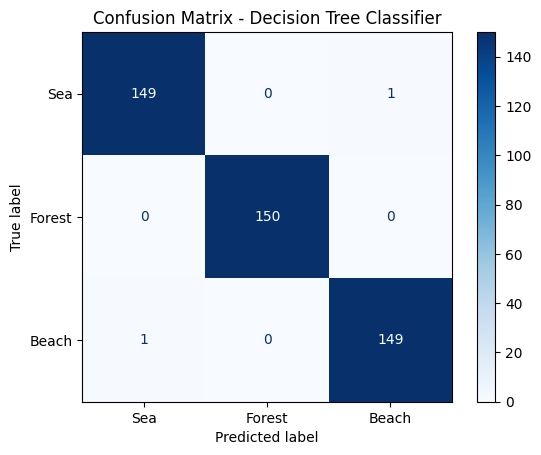

              precision    recall  f1-score   support

         Sea     0.9933    0.9933    0.9933       150
      Forest     1.0000    1.0000    1.0000       150
       Beach     0.9933    0.9933    0.9933       150

    accuracy                         0.9956       450
   macro avg     0.9956    0.9956    0.9956       450
weighted avg     0.9956    0.9956    0.9956       450

Accuracy (Decision Tree Test Set): 0.9956


In [ ]:
# ================= Decision Tree =================
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

cv_scores_dt = cross_val_score(clf, X, y, cv=cv, scoring="accuracy")
print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std():.4f})")

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sea", "Forest", "Beach"])
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Sea", "Forest", "Beach"], digits=4))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Decision Tree Test Set): {accuracy:.4f}")

## Step 4: Train with Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Logistic Regression CV Accuracy: 0.9787 (+/- 0.0075)


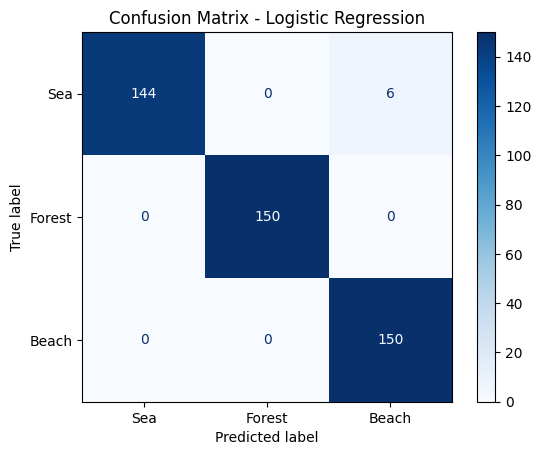

              precision    recall  f1-score   support

         Sea     1.0000    0.9600    0.9796       150
      Forest     1.0000    1.0000    1.0000       150
       Beach     0.9615    1.0000    0.9804       150

    accuracy                         0.9867       450
   macro avg     0.9872    0.9867    0.9867       450
weighted avg     0.9872    0.9867    0.9867       450

Accuracy (Logistic Regression Test Set): 0.9867


In [ ]:
# ================= Logistic Regression =================
log_reg = LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr')
log_reg.fit(X_train, y_train)

cv_scores_lr = cross_val_score(log_reg, X, y, cv=cv, scoring="accuracy")
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")

y_pred_log_reg = log_reg.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=["Sea", "Forest", "Beach"])
disp_log_reg.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print(classification_report(y_test, y_pred_log_reg, target_names=["Sea", "Forest", "Beach"], digits=4))
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy (Logistic Regression Test Set): {accuracy_log_reg:.4f}")

## Step 4: Train with Support Vector Machine

SVM CV Accuracy: 0.9387 (+/- 0.0078)


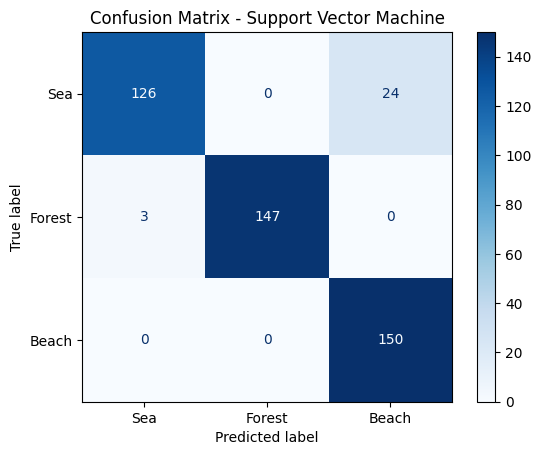

              precision    recall  f1-score   support

         Sea     0.9767    0.8400    0.9032       150
      Forest     1.0000    0.9800    0.9899       150
       Beach     0.8621    1.0000    0.9259       150

    accuracy                         0.9400       450
   macro avg     0.9463    0.9400    0.9397       450
weighted avg     0.9463    0.9400    0.9397       450

Accuracy (SVM Test Set): 0.9400


In [ ]:
# ================= Support Vector Machine =================
svm_clf = SVC(kernel="rbf", random_state=42)
svm_clf.fit(X_train, y_train)

cv_scores_svm = cross_val_score(svm_clf, X, y, cv=cv, scoring="accuracy")
print(f"SVM CV Accuracy: {cv_scores_svm.mean():.4f} (+/- {cv_scores_svm.std():.4f})")

y_pred_svm = svm_clf.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_clf.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Sea", "Forest", "Beach"])
disp_svm.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

print(classification_report(y_test, y_pred_svm, target_names=["Sea", "Forest", "Beach"], digits=4))
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM Test Set): {accuracy_svm:.4f}")

## Step 4: Train with Random Forest

Random Forest CV Accuracy: 0.9893 (+/- 0.0033)


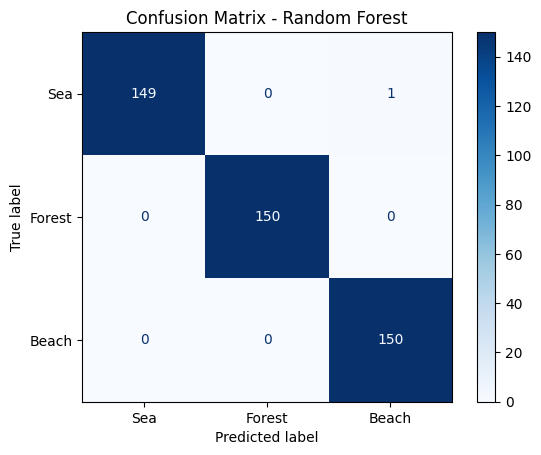

              precision    recall  f1-score   support

         Sea     1.0000    0.9933    0.9967       150
      Forest     1.0000    1.0000    1.0000       150
       Beach     0.9934    1.0000    0.9967       150

    accuracy                         0.9978       450
   macro avg     0.9978    0.9978    0.9978       450
weighted avg     0.9978    0.9978    0.9978       450

Accuracy (Random Forest Test Set): 0.9978


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# ================= Random Forest =================
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

cv_scores_rf = cross_val_score(rf_clf, X, y, cv=cv, scoring="accuracy")
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")

y_pred_rf = rf_clf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Sea", "Forest", "Beach"])
disp_rf.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print(classification_report(y_test, y_pred_rf, target_names=["Sea", "Forest", "Beach"], digits=4))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest Test Set): {accuracy_rf:.4f}")

In [ ]:
import joblib
import os

# Define the path to save the model
model_path = '/content/drive/MyDrive/random_forest_model.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model
joblib.dump(rf_clf, model_path)

print(f"Random Forest model saved to: {model_path}")

Random Forest model saved to: /content/drive/MyDrive/random_forest_model.pkl


## Step 5: Visualization

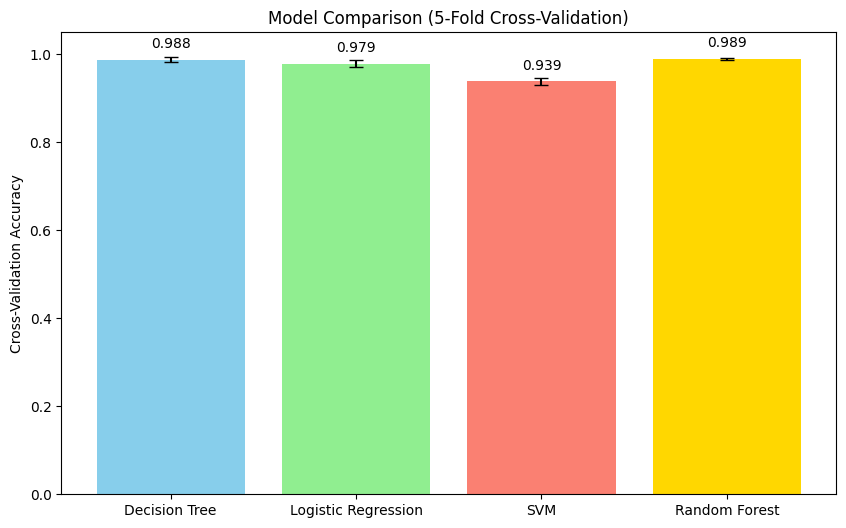

In [ ]:
# --- Step 5: Plot Cross-Validation Accuracy ---
models = ["Decision Tree", "Logistic Regression", "SVM", "Random Forest"]
cv_means = [cv_scores_dt.mean(), cv_scores_lr.mean(), cv_scores_svm.mean(), cv_scores_rf.mean()]
cv_stds = [cv_scores_dt.std(), cv_scores_lr.std(), cv_scores_svm.std(), cv_scores_rf.std()]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, cv_means, yerr=cv_stds, capsize=5, color=["skyblue", "lightgreen", "salmon", "gold"])
plt.ylabel("Cross-Validation Accuracy")
plt.title("Model Comparison (5-Fold Cross-Validation)")
plt.ylim(0, 1.05)

# Add text above bars
for bar, mean in zip(bars, cv_means):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f"{mean:.3f}", ha="center", va="bottom", fontsize=10)

plt.show()

## Step 6: Visualize Dataset Separability

<Figure size 800x500 with 0 Axes>

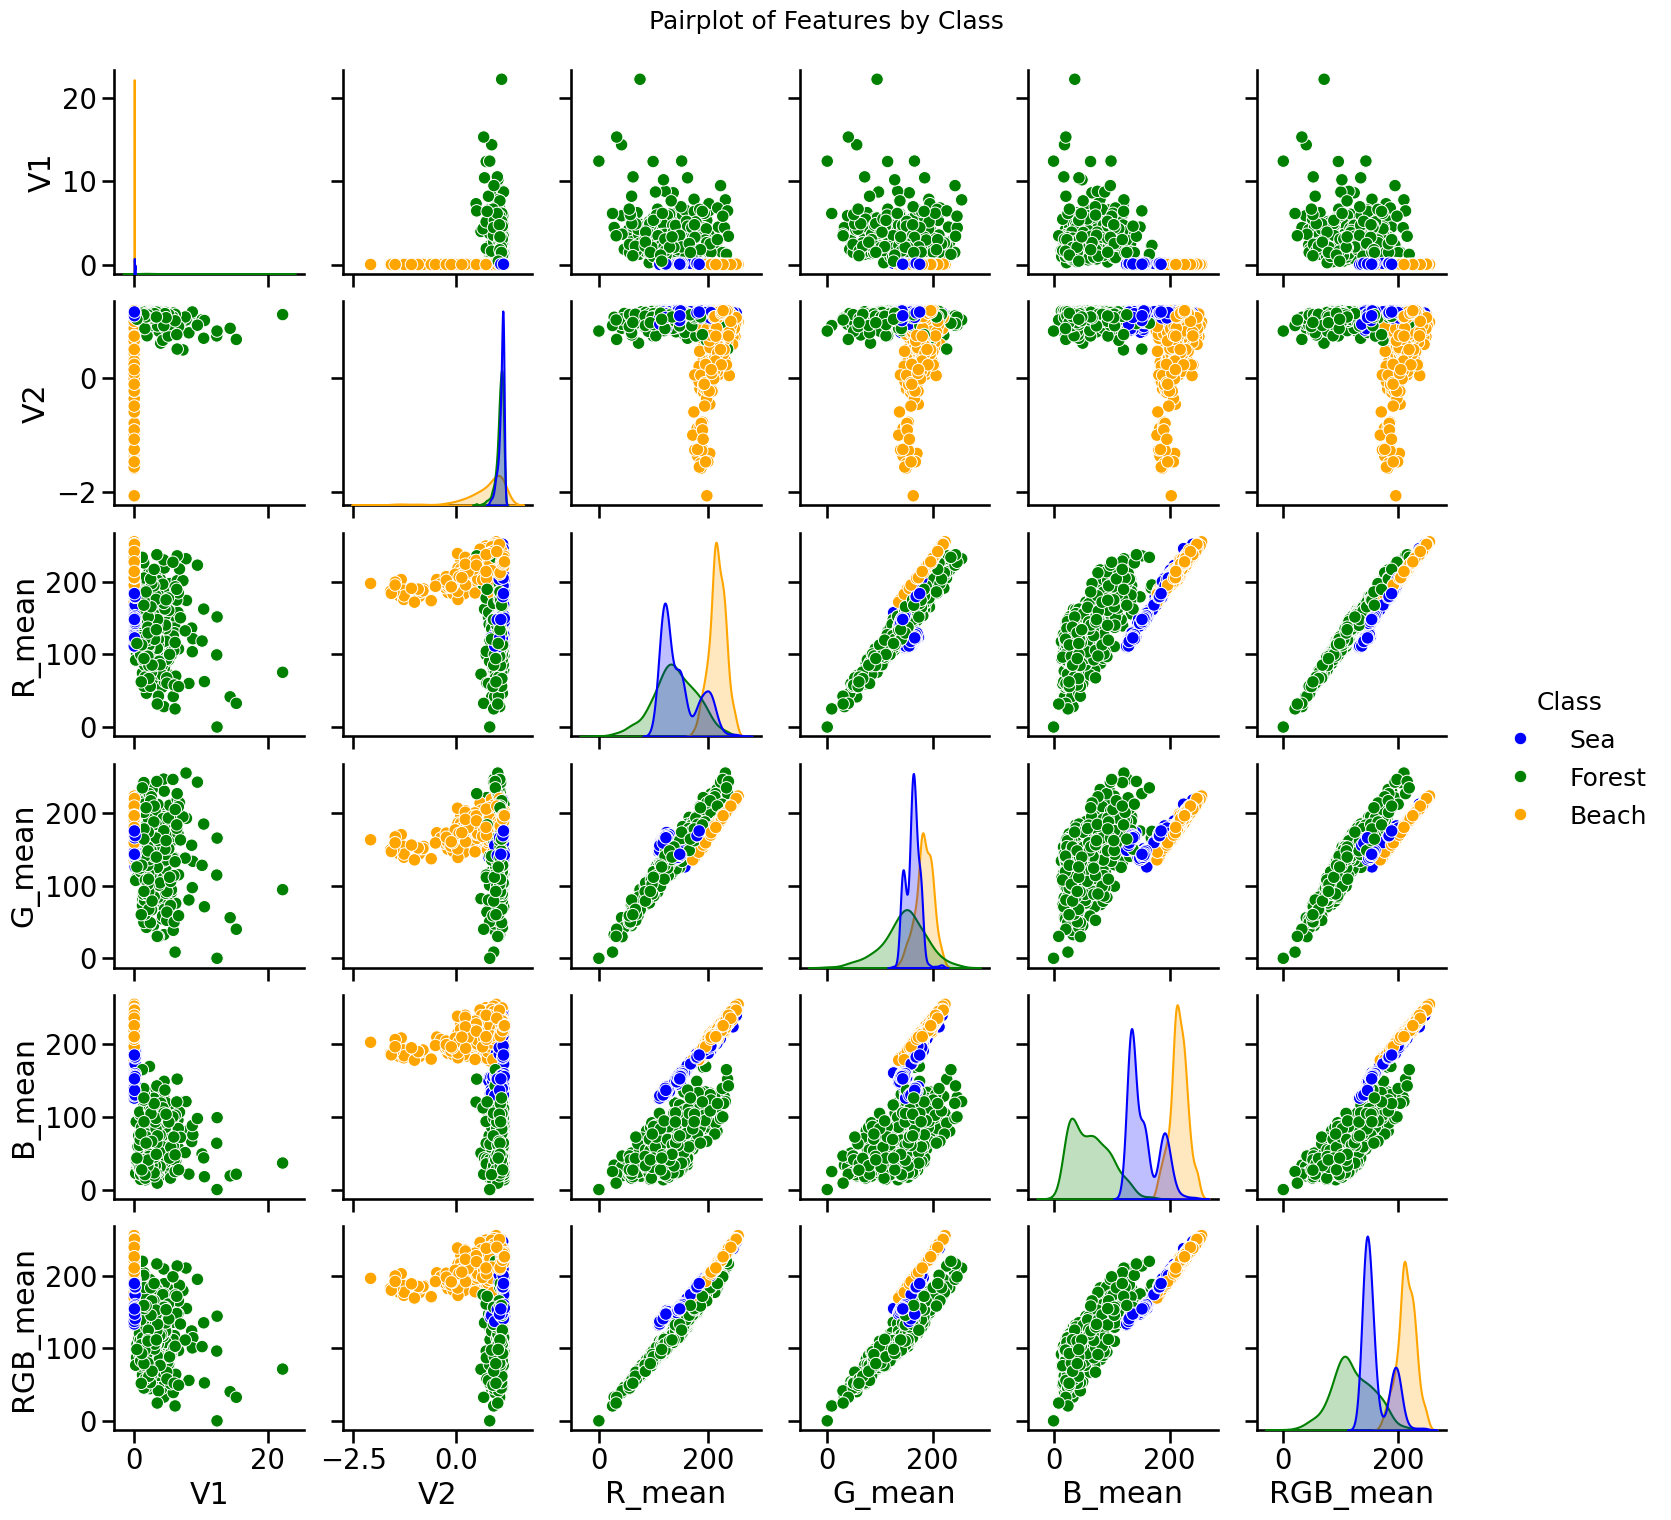

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with normalized features and labels
df_normalized = X.copy()
df_normalized['Class'] = y

# Map the class labels to text
class_labels_map = {0: "Sea", 1: "Forest", 2: "Beach"}
df_normalized['Class_Label'] = df_normalized['Class'].map(class_labels_map)

plt.figure(figsize=(8, 5))

p = sns.pairplot(
    df_normalized,
    hue='Class_Label',
    vars=["V1", "V2", "R_mean", "G_mean", "B_mean", "RGB_mean"],
    hue_order=["Sea", "Forest", "Beach"],
    palette={"Sea": 'blue', "Forest": 'green', "Beach": 'orange'}
)

# Increase legend font size
for text in p._legend.texts:
    text.set_fontsize(18)

p._legend.set_title("Class", prop={'size': 18})

plt.suptitle('Pairplot of Features by Class', y=1.02, fontsize=18)
plt.show()
